In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

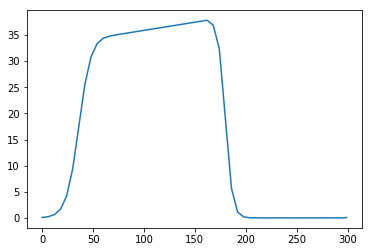

In [2]:
# generate 1 minute of ecto2 tracing
def generate_etco2(etco2, res):
    one_breath = []
    for i in range(12):
        one_breath.append((etco2-3)/(1+math.e**(-1*(i-6))))
    for i in range(16):
        one_breath.append(0.1875*(i)+(etco2-3))
    for i in range(22):
        one_breath.append(etco2-(etco2)/(1+math.e**(-1.75*((i+29)-31))))
    one_minute = []
    for i in range(12):
        one_minute.extend(one_breath)
    highRes_oneMinute = []
    for i in range(len(one_minute)-1):
        sub_segment = res/10
        for j in range(sub_segment):
            highRes_oneMinute.append(((one_minute[i+1]-one_minute[i])/sub_segment)*j+one_minute[i])
    return highRes_oneMinute
test_x = generate_etco2(38,60)
graph, = plt.plot(range(300),test_x[:300])
plt.show()

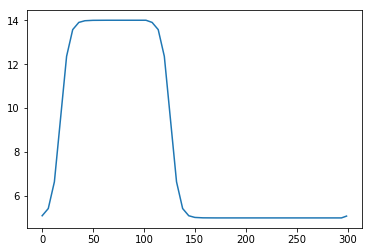

In [3]:
# generate 1 minute of ecto2 tracing
def generate_pressure(peak, peep, res):
    one_breath = []
    for i in range(12):
        one_breath.append(peep+(peak-peep)/(1+math.e**(-1.5*(i-3))))
    for i in range(6):
        one_breath.append(peak)
    for i in range(32):
        one_breath.append(peak-(peak-peep)/(1+math.e**(-1.5*((i+17)-20))))
    one_minute = []
    for i in range(12):
        one_minute.extend(one_breath)
    highRes_oneMinute = []
    for i in range(len(one_minute)-1):
        sub_segment = res/10
        for j in range(sub_segment):
            highRes_oneMinute.append(((one_minute[i+1]-one_minute[i])/sub_segment)*j+one_minute[i])
    return highRes_oneMinute
test_x = generate_pressure(14,5,60)
graph, = plt.plot(range(300),test_x[:300])
plt.show()

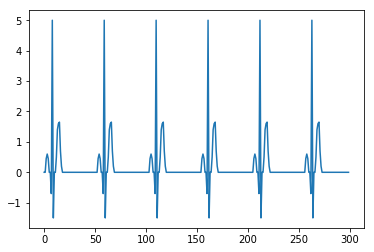

In [4]:
# generate 1 minute of ekg tracing
def generate_ekg(hr):
    one_ekg = [0,0,0.45,0.6,0.45,0,0,-0.7,5,-1.5,0,0,0.5,1.4,1.6,1.65,0.7,0.2,0,0]
    one_minute = []
    framesPerBeat = int(3600.0/hr)
    for i in range(hr):
        one_minute.extend(one_ekg)
        for j in range(framesPerBeat-20):
            one_minute.append(0)
    return one_minute[:3600]
test_x = generate_ekg(70)
graph, = plt.plot(range(300),test_x[:300])
plt.show()

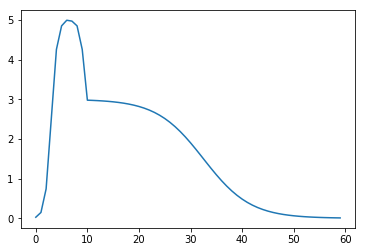

In [5]:
# generate 1 minute of ekg tracing
def generate_art(hr):
    one_art = []
    framesPerBeat = 3600.0/hr
    up_beat = int(framesPerBeat/4.0)
    for i in range(6):
        one_art.append(5/(1+math.e**(-1.75*(i-3))))
    for i in range(4):
        one_art.append(5-5/(1+math.e**(-1.75*((i+5)-9))))
    for i in range(int(framesPerBeat)-10):
        one_art.append(3-3/(1+math.e**(-0.22*((i+up_beat-1)-(up_beat-1+(framesPerBeat*0.375))))))
    one_minute = []
    for i in range(hr):
        one_minute.extend(one_art)
    return one_minute
test_x = generate_art(60)
graph, = plt.plot(range(60),test_x[:60])
plt.show()

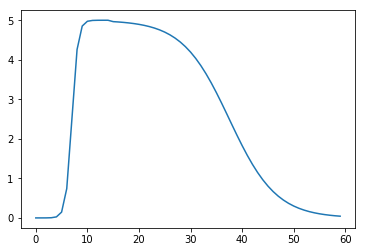

In [6]:
# generate 1 minute of ekg tracing
def generate_spo2(hr):
    one_spo2 = []
    framesPerBeat = 3600.0/hr
    up_beat = int(framesPerBeat/4.0)
    for i in range(up_beat):
        one_spo2.append(5/(1+math.e**(-1.75*(i-int(up_beat*0.5)))))
    for i in range(int(framesPerBeat) - up_beat):
        one_spo2.append(5-5/(1+math.e**(-0.22*((i+up_beat-1)-(up_beat-1+(framesPerBeat*0.375))))))
    one_minute = []
    for i in range(hr):
        one_minute.extend(one_spo2)
    return one_minute[:3600]
test_x = generate_spo2(60)
graph, = plt.plot(range(60),test_x[:60])
plt.show()

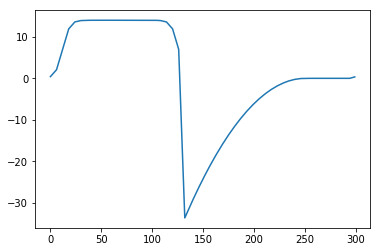

In [7]:
# generate 1 minute of ecto2 tracing
def generate_tidalvolume(peak, res):
    one_breath = []
    for i in range(12):
        one_breath.append((peak)/(1+math.e**(-1.75*(i-2))))
    for i in range(6):
        one_breath.append(peak)
    for i in range(4):
        one_breath.append(peak-(peak)/(1+math.e**(-1.75*((i+17)-20))))
    for i in range(20):
        one_breath.append(-(((i/3.4)-5.8)**2))
    for i in range(8):
        one_breath.append(0)
    one_minute = []
    for i in range(12):
        one_minute.extend(one_breath)
    highRes_oneMinute = []
    for i in range(len(one_minute)-1):
        sub_segment = res/10
        for j in range(sub_segment):
            highRes_oneMinute.append(((one_minute[i+1]-one_minute[i])/sub_segment)*j+one_minute[i])
    return highRes_oneMinute
test_x = generate_tidalvolume(14,60)
graph, = plt.plot(range(300),test_x[:300])
plt.show()

In [8]:
peak = [18,18,18,19,19,19,19,19,19,20,20,20,19,19,18]
peep = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
hr = [71,73,75,69,74,81,83,79,84,82,87,92,84,78,77]
etco2 = [38,37,36,35,36,35,34,33,35,36,37,38,38,37,38]
bp_syst = [102,96,107,116,103,95,110,121,109,94,107,115,108,99,113]
bp_dias = [67,64,71,74,66,62,71,82,75,63,70,76,68,64,72]
bp_mean = [78,74,83,88,78,73,84,95,86,73,82,89,81,75,85]
temp = [36.7,36.8,36.8,36.9,37.0,37.1,37.0,36.9,36.9,36.8,37.0,36.9,36.8,36.9,37.0]
tv = [10,10,12,8,7,10,12,12,10,10,8,8,10,8,7]

In [9]:
all_ekgII = []
all_spo2 = []
all_art = []
all_pressure = []
all_etco2 = []
for i in range(15):
    all_ekgII.append(generate_ekg(hr[i]))
    all_spo2.append(generate_spo2(hr[i]))
    all_art.append(generate_art(bp_mean[i]))
    all_pressure.append(generate_pressure(peak[i],peep[i],60))
    all_etco2.append(generate_etco2(etco2[i],60))
all_ekgV5 = all_ekgII

In [10]:
# Pad everything to same length
maxes = []
for k in [all_ekgII, all_ekgV5, all_spo2, all_art, all_pressure, all_etco2]:
    maxes.append(np.max([len(s) for s in k]))
all_max = np.max(maxes)
for k in [all_ekgII, all_ekgV5, all_spo2, all_art, all_pressure, all_etco2]:
    for i,s in enumerate(k):
        cur_len = len(s)
        diff = all_max-cur_len
        fill = np.mean(s)
        #print cur_len,diff,fill
        for j in xrange(diff):
            k[i].append(fill)

In [ ]:
all

In [18]:
with open("linked_small_multiples/data/vitals.tsv","w") as w:
    w.write('"year"\t"category"\t"n"\n')
    for name,vlist in zip(
        ["II","V5","SpO2","Art","BP","ETCO2"],
        [all_ekgII,all_ekgV5,all_spo2,all_art,all_pressure,all_etco2]):
        for i,v in enumerate(np.hstack(vlist)):
            w.write('"%d"\t"%s"\t%2f\n'%(i,name,v))
    

In [14]:
x= open("linked_small_multiples/data/")

SyntaxError: invalid syntax (<ipython-input-14-a2d66c575801>, line 1)